# Understanding Monte carlo Simulation
> Using Monte carlo simulation to estimate the statistics of any distribution

- sticky_rank: 1
- toc: true 
- badges: true
- comments: true
- hide: false
- categories: [monte-carlo, gamma distribution, beta distribution, beta-binomial distribution, scipy, matplotlib, python]
- image: images/gamma_distribution.png

## Introduction
Monte carlo estimation refers to simulating hypothetical draws from a probablistic distribution in order to calculate important quantities of that distribution like mean, variance, quantiles etc. In this blog we will look at how to calculate these estimations for any given distribution using python scientific packages like scipy, numpy and matplotlib.

## Why Monte carlo?
In general, mathematically we can derive mean, std and other statistics for any [standard](https://docs.scipy.org/doc/scipy/reference/stats.html) distribution. For example the mean of any distribution is obtained using 
$$
E(\theta) = \int_0^\infty \theta P(\theta) d\theta
$$

sometimes calculating this integral is difficult as it involves some complex understanding of calculus. some integrals are almost difficult to solve when it involves heirarical distributions. In these cases monte carlo simulations will help us estimate the required statistics with a margin of error.

In this blog, we will look into two different examples.
- Gamma distribution and estimation of mean using monte carlo simulation
- A binomial distribution of N (10) trails where the probability of success follows a beta distribution (2, 2)

In [1]:
import matplotlib.pyplot as plt
plt.style.use("bmh") ## use bayesian modeling pymc3 book style
import matplotlib
import numpy as np 
import scipy.stats as sps

## Example 1
> Lets try to estimate the mean of a **Gamma** distibution and compare it with actual mean of a gamma distribution. Mean of gamma distribution is $\alpha/\beta$

In [2]:
alpha = [0.5, 1.0, 1.5, 2.0, 2.5]
beta = 0.5
# Probability density function x axis 
k = np.linspace(0, 20, 100)[:, None]

# calculating gamma function at alpha and beta (scale=1/beta) 
pdf = sps.gamma.pdf(k, alpha, scale=1/beta)
print(pdf.shape)

(100, 5)


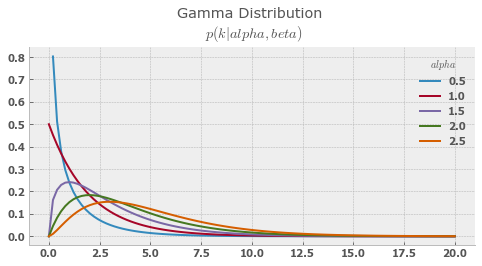

In [3]:
fig, ax = plt.subplots(figsize=(8,3.5))

ax.set(title='Gamma Distribution \n $p(k|alpha, beta)$')

plt.plot(k, pdf)

plt.legend(title="$alpha$", labels=alpha);

- The mean of gamma distribution under these parameters is given by

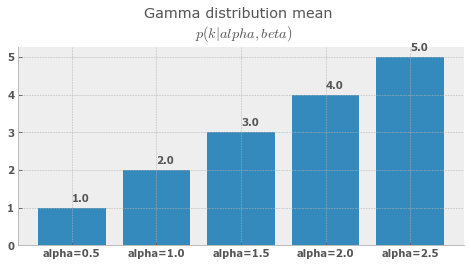

In [4]:
fig, ax = plt.subplots(figsize=(8, 3.5))

ax.set(title="Gamma distribution mean \n $p(k|alpha, beta)$")
x = [f"alpha={i}" for i in alpha]
y = [i/beta for i in alpha]
plt.bar(x, y)
for group in range(len(x)):
    ax.text(x[group], y[group]+0.25, y[group], fontsize=10,
            verticalalignment="center")

- Lets use monte carlo estimation for calculating mean each scenerio

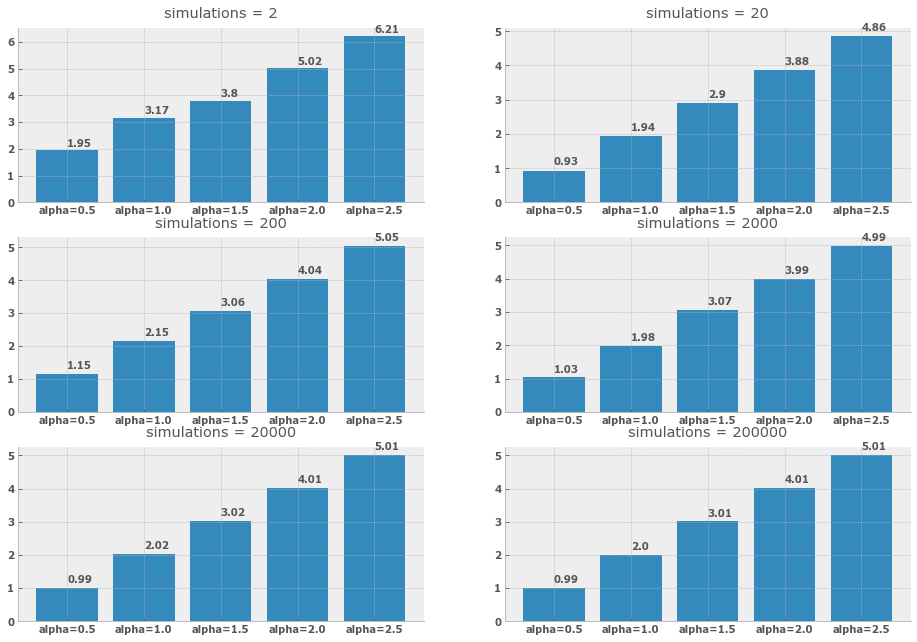

In [5]:
def simulate(alpha, beta, n):
    return [sps.gamma.rvs(i, scale=1/beta, size=n, random_state=20).mean() for i in alpha]

counts = [2, 20, 200, 2000, 20000, 200000]
values = [simulate(alpha, beta, n) for n in counts]

fig, ax = plt.subplots(figsize=(8*2, 3.5*3), nrows=3, ncols=2)
for num, alp in enumerate(values):
    ax.flat[num].set(title=f"simulations = {counts[num]}")
    x = [f"alpha={i}" for i in alpha]
    ax.flat[num].bar(x, alp)
    for group in range(len(x)):
        ax.flat[num].text(x[group], alp[group]+0.25, np.round(alp[group], 2), fontsize=10,
                verticalalignment="center")
    

- In the above figure, we can conclude that, drawing large samples (Law of large numbers), the estimated mean will be almost equal to actual mean of the standard distrbution. By central limit theorm, this estitmated mean follows a normal distribution with mean(as shown above) and standard error.

lets compare the distributions of sampled vs actual gamma distribution

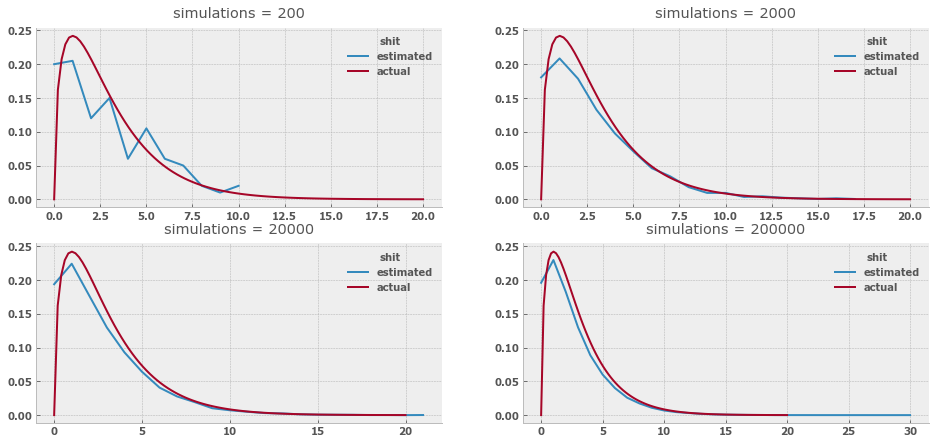

In [6]:
def simulate(alpha, beta, n):
    return sps.gamma.rvs(alpha, scale=1/beta, size=n, random_state=20)

alpha = 1.5
beta = 0.5
counts = [200, 2000, 20000, 200000]
values = [simulate(alpha, beta, n) for n in counts]
k = np.linspace(0, 20, 100)[:, None]
pdf = sps.gamma.pdf(k, alpha, scale=1/beta)

fig, ax = plt.subplots(figsize=(8*2, 3.5*2), nrows=2, ncols=2)
for num, alp in enumerate(values):
    ax.flat[num].set(title=f"simulations = {counts[num]}")
    new_range = np.arange(0, np.int64(alp.max())+1)
    p_estimated = np.histogram(alp, bins=len(new_range))[0]/alp.shape[0]
    ax.flat[num].plot(new_range, p_estimated)
    ax.flat[num].plot(k, pdf)
    ax.flat[num].legend(title="shit", labels=["estimated", "actual"])
    

- the monte carlo simulated samples are identical to the true distribution as we draw more and more samples.

## Example 2
> A binomial distribution of N (10) trails where the probability of success follows a beta distribution (2, 2). 

This quite happens in bayesian modelling where we need to estimate the mean of joint probability of prior and likelihood (we will discuss in detail in some other blog post). In this example
$$
y|\phi = Bin(N, \phi)  
$$
where   
$$
\phi = beta(a, b)  
$$

where N is the number of trails, a and b are shape parameter of beta distribution. 

The joint distribution is defined as 
$$
P(y,\phi) = P(\phi) * p(y/\phi)
$$

Lets use monte carlo simulation to get the shape of this posterior distribution

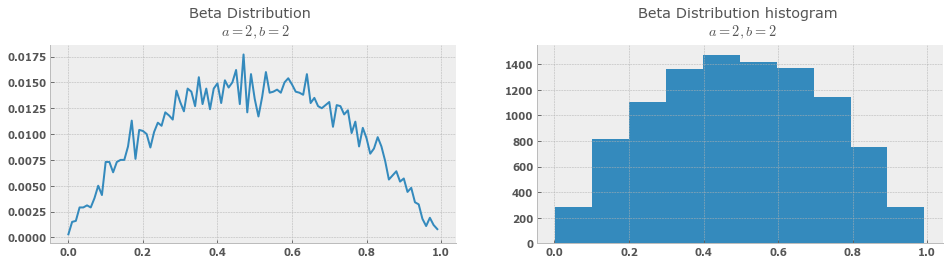

In [7]:
beta = sps.beta.rvs(a=2, b=2, size=10000, random_state=1000)

# calculating beta function with a and b as parameters
new_range = np.arange(0, 100)/100
p_estimated = np.histogram(beta, bins=len(new_range))[0]/beta.shape[0]

fig, ax = plt.subplots(figsize=(8*2,3.5), ncols=2, nrows=1)

ax.flat[0].set(title='Beta Distribution \n $a=2, b=2$')
ax.flat[0].plot(new_range, p_estimated)

ax.flat[1].set(title='Beta Distribution histogram \n $a=2, b=2$')
ax.flat[1].hist(beta)
plt.show()
# plt.legend(title="$alpha$", labels=alpha);

- It follows the pattern similarly shown on [wiki](https://en.wikipedia.org/wiki/Beta_distribution)
- Lets calculate y at all these phi parameters

In [8]:
y = np.asarray([sps.binom.rvs(n=10, p=i, size=1, random_state=1000) for i in beta]) # Not sure how to vectorize this.

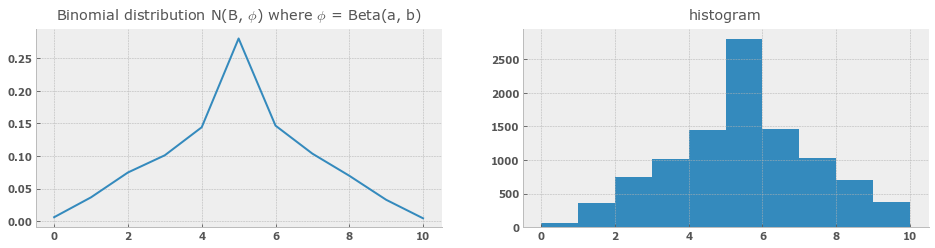

In [9]:
new_range = np.arange(0, int(y.max()+1))
p_estimated = np.histogram(y, bins=len(new_range))[0]/y.shape[0]

fig, ax = plt.subplots(figsize=(8*2,3.5), ncols=2, nrows=1)
ax.flat[0].set(title="Binomial distribution N(B, $\phi$) where $\phi$ = Beta(a, b)")
ax.flat[0].plot(new_range, p_estimated)

ax.flat[1].set(title='histogram')
ax.flat[1].hist(y)
plt.show()

- This distribution is called beta-binomial

In [10]:
print(f"Estimated mean of the distribution: {np.mean(y)}")

Estimated mean of the distribution: 4.9688


- We can also calculate the probability of getting any value, lets calculate P(y=i| N, $\phi$), where i =1, 2, 3, 4,...10)

In [11]:
for i in range(10):
    print(f"P(y={i}|N, phi) = {(y==i).sum()/y.shape[0]}")

P(y=0|N, phi) = 0.0061
P(y=1|N, phi) = 0.0366
P(y=2|N, phi) = 0.0747
P(y=3|N, phi) = 0.1011
P(y=4|N, phi) = 0.1441
P(y=5|N, phi) = 0.2803
P(y=6|N, phi) = 0.1466
P(y=7|N, phi) = 0.1036
P(y=8|N, phi) = 0.0697
P(y=9|N, phi) = 0.0328


- In this tutorial, we understood how to calculate statistics for any kind of distribution using Monte carlo simulation. I will try to add more examples and different use cases of monte carlo simulation. Watch this space.

<script src="https://utteranc.es/client.js"
        repo="carbon2silicon"
        issue-term="pathname"
        theme="github-light"
        crossorigin="anonymous"
        async>
</script>